### Getting data from yann lecunn dataset

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [1]:
import idx2numpy
import seaborn as sns

#### Extract Training data

In [2]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [3]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
X_train.shape

(60000, 784)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train.shape

(60000,)

#### Extract Test data

In [7]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [8]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
X_test.shape

(10000, 784)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
y_test.shape

(10000,)

#### Function to display a digit image from one 1-d representation of pixels

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
   
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

##### Displaying a set of digits

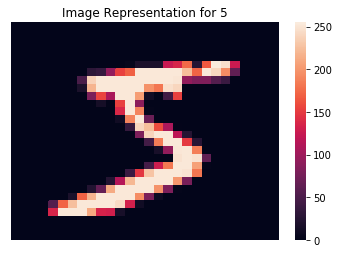

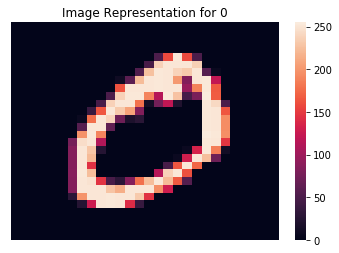

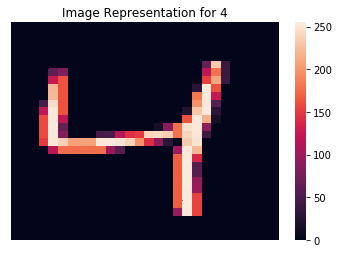

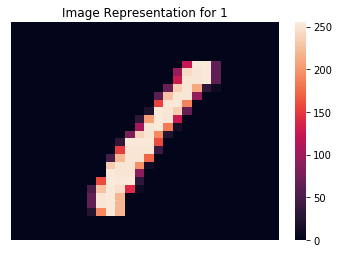

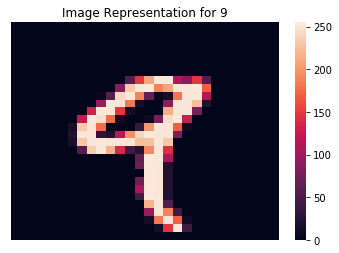

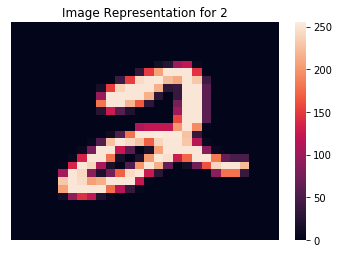

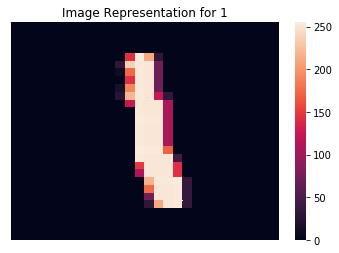

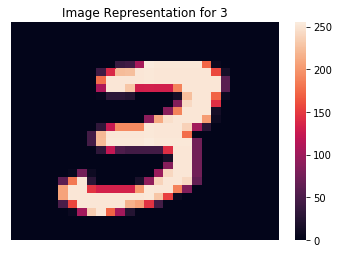

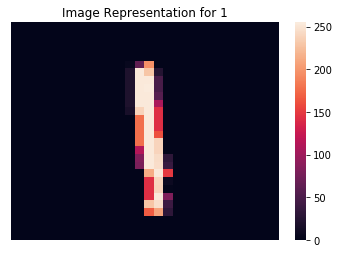

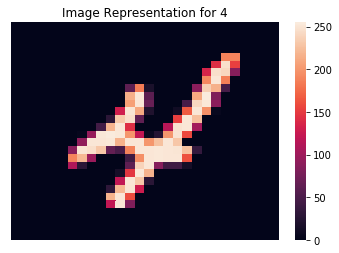

In [13]:
for i in range(10):
    display(X_train[i],y_train[i])

# Random Forest  classifier

In [14]:
from sklearn.utils import shuffle
X_shuffle,y_shuffle = shuffle(X_train,y_train)
X_train = X_shuffle[0:30000]
y_train = y_shuffle[0:30000]

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict


rf_clf = RandomForestClassifier(max_depth=20, random_state=0)

y_train_pred = cross_val_predict(rf_clf, X_train, y_train, cv=3)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

##### Calculate Cross Validation Score

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.92722183,  0.9272    ,  0.9236771 ])

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [17]:
y_train_pred

array([8, 7, 3, ..., 5, 6, 9], dtype=uint8)

In [18]:
y_train

array([8, 9, 3, ..., 5, 6, 9], dtype=uint8)

**Create a confusion matrix for cross validation prediction & actual labels**

In [19]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [20]:
confusionMatrix

array([[2926,    1,   11,    6,    9,    8,   20,    0,   16,    3],
       [   0, 3268,   18,    8,    9,    8,    6,   10,   10,    2],
       [  32,   19, 2778,   35,   30,   10,   24,   28,   30,    9],
       [  18,   14,   81, 2784,    6,   72,    9,   25,   51,   26],
       [  12,   18,   17,    3, 2722,    8,   29,   14,   18,   86],
       [  38,   12,   17,  103,   20, 2411,   39,    6,   29,   19],
       [  30,   12,   24,    3,   12,   37, 2763,    0,   11,    4],
       [   5,   20,   50,   15,   34,    5,    3, 2937,    7,   68],
       [  20,   37,   71,   99,   38,   58,   31,    5, 2544,   42],
       [  15,   10,   24,   50,   94,   23,    4,   70,   36, 2648]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

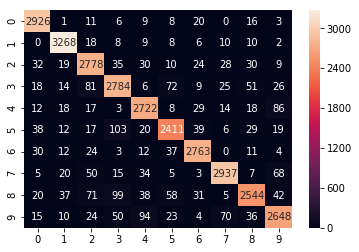

In [21]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [22]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

In [23]:
import numpy as np
#import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)

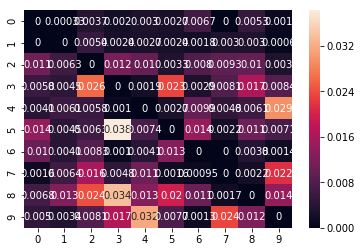

In [24]:
ax = sns.heatmap(norm_conf_mx,annot=True)

**Plot Confusion Matrix against Test data**

In [25]:
y_test_pred = rf_clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [26]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 970,    0,    1,    2,    1,    0,    2,    1,    3,    0],
       [   0, 1125,    2,    1,    0,    3,    2,    1,    1,    0],
       [  13,    2,  966,   11,    4,    4,    5,    7,   17,    3],
       [   3,    1,   21,  927,    0,   24,    2,    9,   18,    5],
       [   3,    1,    6,    2,  921,    2,    8,    5,    4,   30],
       [   9,    2,    2,   44,    6,  800,   12,    3,    9,    5],
       [  18,    4,    5,    0,    5,   12,  907,    0,    7,    0],
       [   3,    9,   26,    2,    5,    0,    0,  953,    8,   22],
       [  13,    5,   14,   25,   10,   22,    4,    7,  862,   12],
       [  11,    6,    4,   14,   29,    6,    3,   11,   11,  914]], dtype=int64)

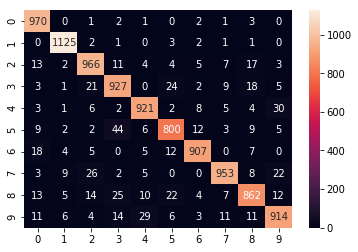

In [27]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [28]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

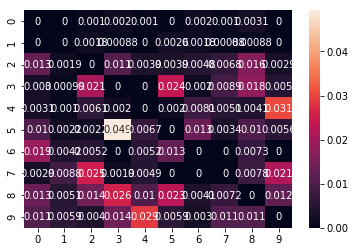

In [29]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9345